In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Define input and output directories
input_dir = "./load"  # Directory containing result files
output_dir = "./plots"
os.makedirs(output_dir, exist_ok=True)

# Define databases and record counts
databases = ["redis", "memcached", "PostgreSQL"]
record_counts = [1000, 10000, 100000, 500000]
colors = ['red', 'green', 'lightblue']  # Lighter blue for PostgreSQL

# Initialize data structures for storing metrics
overall_time = {}
insert_avg_latency = {}

In [8]:
# Parse result files
for db in databases:
    overall_time[db] = []
    insert_avg_latency[db] = []
    for record_count in record_counts:
        file_name = f"load_{db}_{record_count}.txt"
        file_path = os.path.join(input_dir, file_name)
        with open(file_path, "r") as f:
            content = f.read()
            # Extract metrics using regex
            time_match = re.search(r"\[OVERALL\], RunTime\(ms\), (\d+)", content)
            latency_match = re.search(r"\[INSERT\], AverageLatency\(us\), ([\d\.]+)", content)
            # Store extracted values
            overall_time[db].append(int(time_match.group(1)) if time_match else 0)
            insert_avg_latency[db].append(float(latency_match.group(1)) if latency_match else 0)


In [11]:
# Function to create bar plots
def plot_metric(metric_dict, metric_name, ylabel, file_name):
    x = np.arange(len(record_counts))
    bar_width = 0.2

    plt.figure(figsize=(10, 6))
    for i, db in enumerate(databases):
        plt.bar(x + i * bar_width, metric_dict[db], bar_width, label=db, color=colors[i])

    plt.xticks(x + bar_width, record_counts)
    plt.xlabel("recordcount")
    plt.ylabel(ylabel)
    plt.title(f"Load - {metric_name}", fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    
    plot_file_name = f"load_{file_name}.png"
    plt.savefig(os.path.join(output_dir, plot_file_name))
    plt.show()
    plt.close()

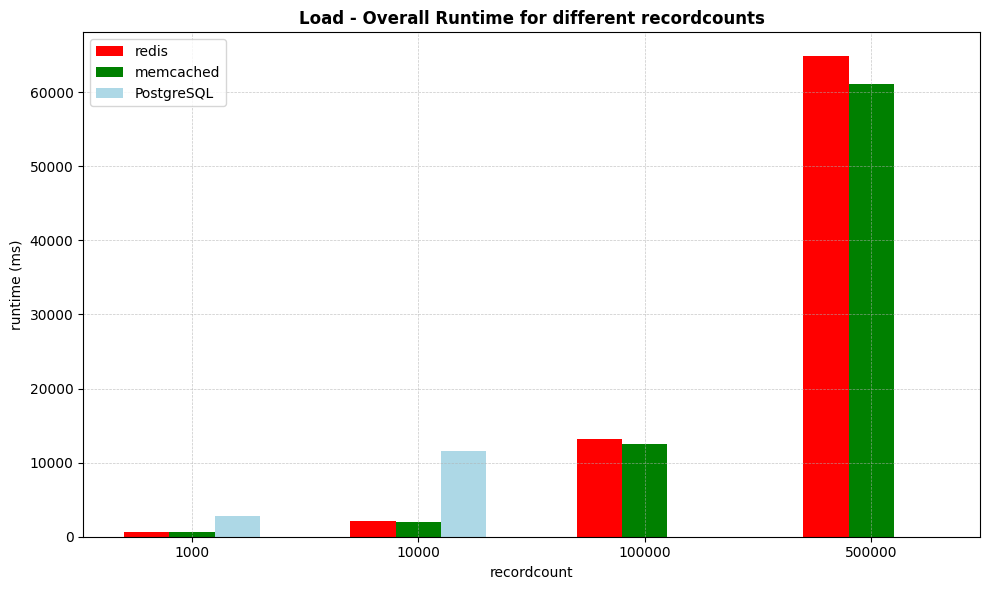

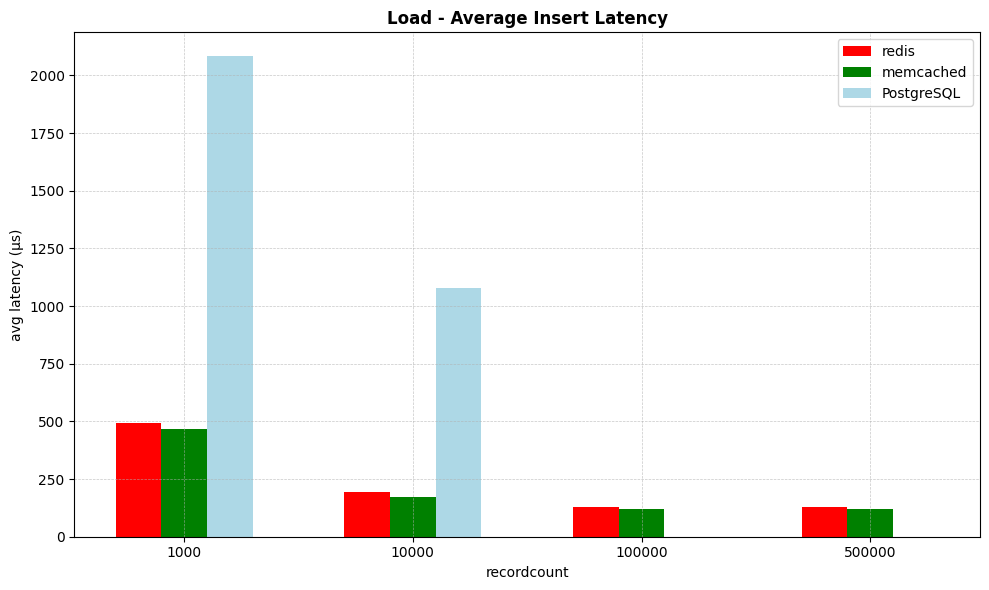

In [12]:
plot_metric(overall_time, "Overall Runtime for different recordcounts", "runtime (ms)", "overall_runtime")
plot_metric(insert_avg_latency, "Average Insert Latency", "avg latency (µs)", "insert_avg_latency")